In [ ]:
import pandas as pd

In [ ]:
data_df = pd.read_csv('/content/drive/My Drive/Datathon/processed_data/final_data.csv').drop(columns=['Unnamed: 0'], axis=1)
data_df.head()

,VenueID,CheckinBefore,CheckinAfter,NearPlaceEntropy,OlympicDistance,NearestStationDistance,StationPagerank
0,4abe4502f964a520558c20e3,33,31,0.238129,1.160000,0.56,0.004480
1,4abf8c03f964a520079120e3,57,24,0.115433,1.850000,0.30,0.002550
2,4ac51183f964a52048a020e3,6,6,1.133732,2.730000,0.95,0.002845
3,4ac51183f964a52049a020e3,2,6,0.256612,2.113333,0.43,0.002632
4,4ac518b4f964a52072a020e3,4,4,0.171440,1.256667,0.32,0.002410


In [ ]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns[3:]:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [ ]:
norm_df = normalize(data_df)
norm_df.head()

,VenueID,CheckinBefore,CheckinAfter,NearPlaceEntropy,OlympicDistance,NearestStationDistance,StationPagerank
0,4abe4502f964a520558c20e3,33,31,0.058079,0.010458,0.050738,0.465300
1,4abf8c03f964a520079120e3,57,24,0.022272,0.055556,0.026753,0.165017
2,4ac51183f964a52048a020e3,6,6,0.319445,0.113072,0.086716,0.210829
3,4ac51183f964a52049a020e3,2,6,0.063473,0.072767,0.038745,0.177666
4,4ac518b4f964a52072a020e3,4,4,0.038617,0.016776,0.028598,0.143094


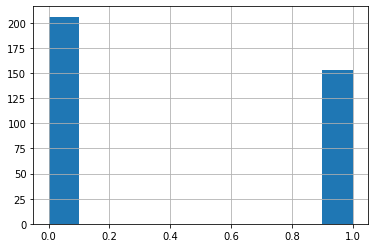

In [ ]:
X = norm_df[norm_df.columns[3:]]
y = (norm_df['CheckinAfter'] >= 1.1*norm_df['CheckinBefore']).astype(int)
y.hist()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict, KFold

logistic_clf = LogisticRegression()
pred = cross_val_predict(logistic_clf, X, y, cv=KFold(len(y)))

In [ ]:
from sklearn.metrics import precision_score, recall_score, auc


precision_score(y, pred), recall_score(y, pred), auc()

(0.5405405405405406, 0.13071895424836602)